In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

### Pre-processing

In [69]:
# Reading the Training Data
df = pd.read_csv("/content/sample_data/test_set_nogt.csv")

# New Section

In [70]:
# 1. Displaying the first 10 records
df.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
1,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
2,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
3,NaN,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00
4,NaN,281.18,0.0,0.0,1,Clear,sky is clear,03-10-2012 02:00
5,NaN,278.12,0.0,0.0,1,Clear,sky is clear,03-10-2012 08:00
6,NaN,283.17,0.0,0.0,1,Clear,sky is clear,04-10-2012 02:00
7,NaN,297.32,0.0,0.0,1,Clear,sky is clear,04-10-2012 14:00
8,NaN,297.67,0.0,0.0,20,Clouds,few clouds,04-10-2012 17:00
9,NaN,291.77,0.0,0.0,75,Clouds,broken clouds,04-10-2012 21:00


In [71]:
# 2. Check dataset info - field types, non-null values, dtypes
df_data = df.copy()


In [72]:
df_data.info()
# In this dataset we have a 8 data types
# 4 Object data types which include string datatypes
# 4 Numerical data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              16 non-null     object 
 1   temp                 9641 non-null   float64
 2   rain_1h              9641 non-null   float64
 3   snow_1h              9641 non-null   float64
 4   clouds_all           9641 non-null   int64  
 5   weather_main         9641 non-null   object 
 6   weather_description  9641 non-null   object 
 7   date_time            9641 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 602.7+ KB


In [74]:
# seggarte_dataype = []
# for i in df_data:
#   if:
#     pass



In [75]:
df_data.describe(include="all")

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
count,16,9641.000000,9641.000000,9641.000000,9641.000000,9641,9641,9641
unique,9,NaN,NaN,NaN,NaN,11,34,9265
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,08-05-2014 07:00
freq,3,NaN,NaN,NaN,NaN,3022,2396,4
mean,NaN,281.361928,0.126092,0.000156,48.843481,NaN,NaN,NaN
std,NaN,12.806372,0.899434,0.006849,39.038361,NaN,NaN,NaN
min,NaN,243.620000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,272.280000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,282.550000,0.000000,0.000000,64.000000,NaN,NaN,NaN
75%,NaN,291.870000,0.000000,0.000000,90.000000,NaN,NaN,NaN


In [76]:
# . Pre-processing (Cleaning): Remove Duplicate Rows
is_duplicated = df_data.duplicated().value_counts()
is_duplicated
# there sis no any duplicated values prsent here

False    9641
Name: count, dtype: int64

In [77]:
#Pre-processing (Cleaning): Address missing (NULL) values - drop or imputation
null_values = df_data.isna()
null_values

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9636,True,False,False,False,False,False,False,False
9637,True,False,False,False,False,False,False,False
9638,True,False,False,False,False,False,False,False
9639,True,False,False,False,False,False,False,False


In [78]:
checking_holiday_null = df_data['holiday'].isna().value_counts()
print(checking_holiday_null[checking_holiday_null > 0])



holiday
True     9625
False      16
Name: count, dtype: int64


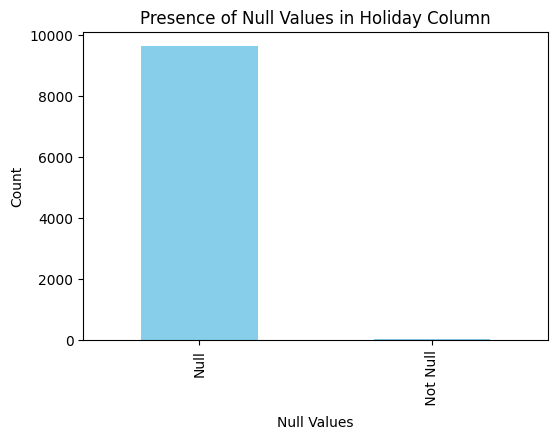

In [79]:
#Most of the values we have a null values in Holiday column  better we can drop it
plt.figure(figsize=(6, 4))
checking_holiday_null.plot(kind='bar', color='skyblue')
plt.title('Presence of Null Values in Holiday Column')
plt.xlabel('Null Values')
plt.ylabel('Count')
plt.xticks([False, True], ['Null', ' Not Null'])
plt.show()

In [80]:
df_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
1,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
2,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,02-10-2012 13:00
3,NaN,291.72,0.00,0.0,1,Clear,sky is clear,02-10-2012 14:00
4,NaN,281.18,0.00,0.0,1,Clear,sky is clear,03-10-2012 02:00
...,...,...,...,...,...,...,...,...
9636,NaN,280.28,0.00,0.0,90,Clouds,overcast clouds,30-09-2018 08:00
9637,NaN,282.18,0.00,0.0,90,Clouds,overcast clouds,30-09-2018 11:00
9638,NaN,283.48,0.00,0.0,90,Rain,light rain,30-09-2018 14:00
9639,NaN,283.48,0.00,0.0,90,Drizzle,light intensity drizzle,30-09-2018 14:00


In [81]:
df_data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object

In [82]:
holiday = df_data.holiday.value_counts()
holiday

holiday
Labor Day                    3
Independence Day             3
Washingtons Birthday         2
Thanksgiving Day             2
State Fair                   2
Christmas Day                1
New Years Day                1
Martin Luther King Jr Day    1
Memorial Day                 1
Name: count, dtype: int64

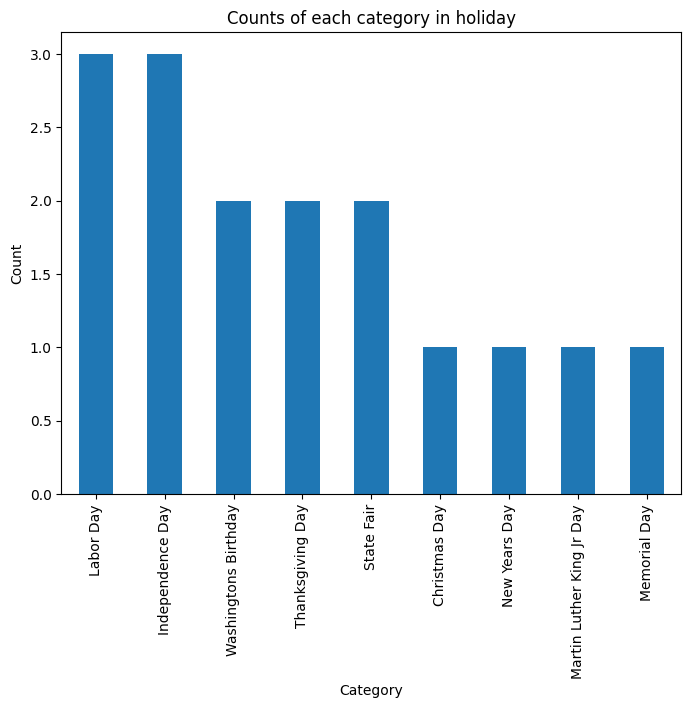

In [83]:
plt.figure(figsize=(8, 6))
df_data['holiday'].value_counts().plot(kind='bar')
plt.title('Counts of each category in holiday')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [84]:
df_data = df_data.drop(columns=['holiday'])
df_data

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,289.58,0.00,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
1,290.13,0.00,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
2,291.14,0.00,0.0,75,Clouds,broken clouds,02-10-2012 13:00
3,291.72,0.00,0.0,1,Clear,sky is clear,02-10-2012 14:00
4,281.18,0.00,0.0,1,Clear,sky is clear,03-10-2012 02:00
...,...,...,...,...,...,...,...
9636,280.28,0.00,0.0,90,Clouds,overcast clouds,30-09-2018 08:00
9637,282.18,0.00,0.0,90,Clouds,overcast clouds,30-09-2018 11:00
9638,283.48,0.00,0.0,90,Rain,light rain,30-09-2018 14:00
9639,283.48,0.00,0.0,90,Drizzle,light intensity drizzle,30-09-2018 14:00


In [85]:
df_data['temp'].value_counts()

temp
274.150    23
271.150    19
275.150    19
276.793    16
292.150    15
           ..
252.180     1
298.840     1
299.810     1
301.700     1
280.940     1
Name: count, Length: 3986, dtype: int64

In [86]:
df_data.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time'],
      dtype='object')

In [87]:
df_data['rain_1h'].value_counts()

rain_1h
0.00    8901
0.25     207
0.51      57
0.30      34
1.02      34
        ... 
0.65       1
3.47       1
1.25       1
5.11       1
2.96       1
Name: count, Length: 188, dtype: int64

In [88]:
show_1h_data =df_data['snow_1h'].value_counts()
show_1h_data

snow_1h
0.00    9632
0.06       4
0.51       1
0.32       1
0.21       1
0.05       1
0.17       1
Name: count, dtype: int64

In [89]:
df_data.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time'],
      dtype='object')

In [90]:
df_data['clouds_all'].value_counts()

clouds_all
90     3222
1      2606
75     1031
40      791
0       399
20      352
64      318
5       218
92      171
8        61
12       58
24       40
48       40
36       38
68       37
56       36
32       35
88       32
80       32
44       31
76       24
93        9
100       8
99        8
57        5
89        4
46        4
98        3
96        3
91        3
85        3
97        3
59        2
11        2
81        2
87        2
25        2
67        1
77        1
3         1
83        1
13        1
63        1
Name: count, dtype: int64

In [91]:
top_count = df_data['clouds_all'].value_counts()[0:10]
top_count

clouds_all
90    3222
1     2606
75    1031
40     791
0      399
20     352
64     318
5      218
92     171
8       61
Name: count, dtype: int64

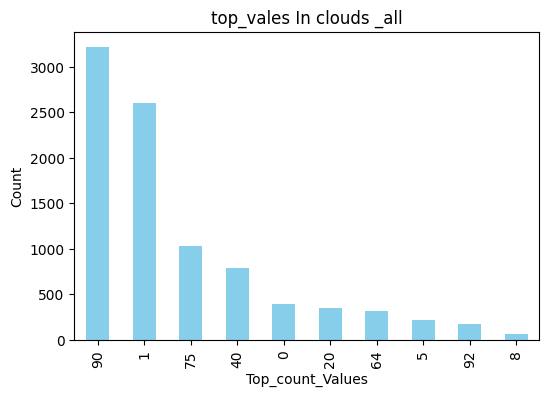

In [92]:
plt.figure(figsize=(6, 4))
top_count.plot(kind='bar', color='skyblue')
plt.title('top_vales In clouds _all')
plt.xlabel('Top_count_Values')
plt.ylabel('Count')
plt.show()

In [93]:
df_data['weather_main'].value_counts()

weather_main
Clouds          3022
Clear           2750
Mist            1161
Rain            1133
Snow             548
Drizzle          376
Haze             265
Thunderstorm     221
Fog              161
Smoke              3
Squall             1
Name: count, dtype: int64

In [94]:
weather_main_val = df_data['weather_main'].value_counts()[0:10]
weather_main_val

weather_main
Clouds          3022
Clear           2750
Mist            1161
Rain            1133
Snow             548
Drizzle          376
Haze             265
Thunderstorm     221
Fog              161
Smoke              3
Name: count, dtype: int64

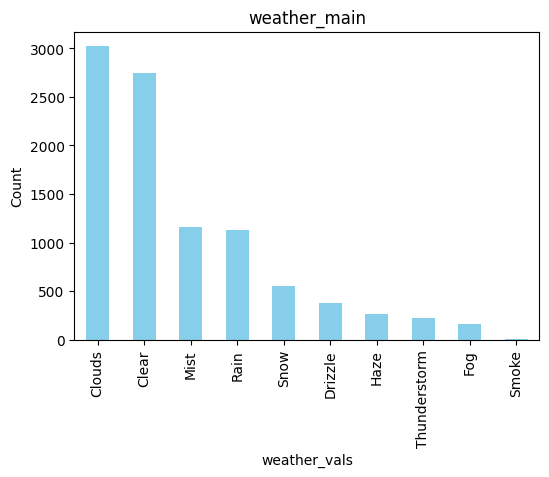

In [95]:
plt.figure(figsize=(6, 4))
weather_main_val.plot(kind='bar', color='skyblue')
plt.title('weather_main')
plt.xlabel('weather_vals')
plt.ylabel('Count')
plt.show()

In [96]:
weather_desc = df_data['weather_description'].value_counts()
weather_desc

weather_description
sky is clear                           2396
mist                                   1161
broken clouds                           970
overcast clouds                         968
light rain                              703
scattered clouds                        697
light snow                              388
few clouds                              387
Sky is Clear                            354
moderate rain                           309
haze                                    265
light intensity drizzle                 249
fog                                     161
proximity thunderstorm                  142
drizzle                                 116
heavy snow                              108
heavy intensity rain                     95
snow                                     50
thunderstorm                             36
proximity shower rain                    21
thunderstorm with light rain             14
thunderstorm with heavy rain             13
heavy intens

In [97]:
weather_desc_10 = df_data['weather_description'].value_counts()[0:10]

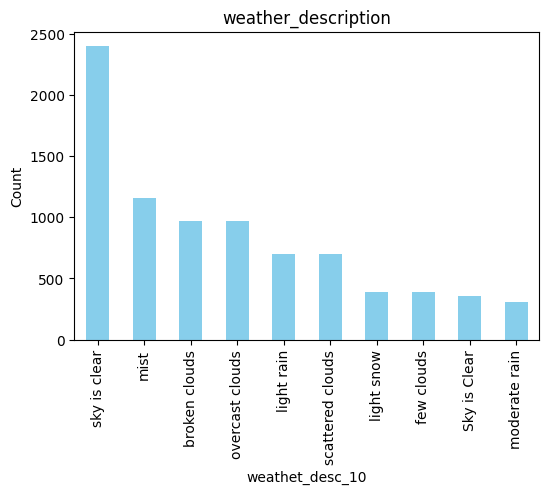

In [98]:
plt.figure(figsize=(6, 4))
weather_desc_10.plot(kind='bar', color='skyblue')
plt.title('weather_description')
plt.xlabel('weathet_desc_10')
plt.ylabel('Count')
plt.show()

In [99]:
df_data.date_time

0       02-10-2012 11:00
1       02-10-2012 12:00
2       02-10-2012 13:00
3       02-10-2012 14:00
4       03-10-2012 02:00
              ...       
9636    30-09-2018 08:00
9637    30-09-2018 11:00
9638    30-09-2018 14:00
9639    30-09-2018 14:00
9640    30-09-2018 18:00
Name: date_time, Length: 9641, dtype: object

In [100]:
df_data['date_time'] = pd.to_datetime(df_data['date_time'],format='%d-%m-%Y %H:%M')

In [101]:
df_data['date_time']

0      2012-10-02 11:00:00
1      2012-10-02 12:00:00
2      2012-10-02 13:00:00
3      2012-10-02 14:00:00
4      2012-10-03 02:00:00
               ...        
9636   2018-09-30 08:00:00
9637   2018-09-30 11:00:00
9638   2018-09-30 14:00:00
9639   2018-09-30 14:00:00
9640   2018-09-30 18:00:00
Name: date_time, Length: 9641, dtype: datetime64[ns]

In [102]:
df_data['year'] = df_data['date_time'].dt.year
df_data['month'] = df_data['date_time'].dt.month
df_data['day'] = df_data['date_time'].dt.day
df_data['hour'] = df_data['date_time'].dt.hour
df_data['day_of_week'] = df_data['date_time'].dt.dayofweek

In [103]:
df_data

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,year,month,day,hour,day_of_week
0,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,10,2,11,1
1,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,2012,10,2,12,1
2,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,2012,10,2,13,1
3,291.72,0.00,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,2012,10,2,14,1
4,281.18,0.00,0.0,1,Clear,sky is clear,2012-10-03 02:00:00,2012,10,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,280.28,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 08:00:00,2018,9,30,8,6
9637,282.18,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 11:00:00,2018,9,30,11,6
9638,283.48,0.00,0.0,90,Rain,light rain,2018-09-30 14:00:00,2018,9,30,14,6
9639,283.48,0.00,0.0,90,Drizzle,light intensity drizzle,2018-09-30 14:00:00,2018,9,30,14,6


In [104]:
df_data.columns


Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'year', 'month', 'day', 'hour',
       'day_of_week'],
      dtype='object')

In [105]:
df_data['temp'].dtype

dtype('float64')

In [67]:
df_data

In [106]:
df_data.drop('date_time', axis=1, inplace=True)


In [129]:
df_data

,temp,rain_1h,snow_1h,clouds_all,year,month,day,hour,day_of_week
0,289.58,0.00,0.0,90,2012,10,2,11,1
1,290.13,0.00,0.0,90,2012,10,2,12,1
2,291.14,0.00,0.0,75,2012,10,2,13,1
3,291.72,0.00,0.0,1,2012,10,2,14,1
4,281.18,0.00,0.0,1,2012,10,3,2,2
...,...,...,...,...,...,...,...,...,...
9636,280.28,0.00,0.0,90,2018,9,30,8,6
9637,282.18,0.00,0.0,90,2018,9,30,11,6
9638,283.48,0.00,0.0,90,2018,9,30,14,6
9639,283.48,0.00,0.0,90,2018,9,30,14,6


In [164]:
df_data['temp'] = df_data['temp'].astype(int)


In [165]:
df_data['temp'].dtype

dtype('int64')

In [166]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [167]:
df_data.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'year', 'month', 'day',
       'hour', 'day_of_week'],
      dtype='object')

In [168]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X = df_data.drop(['temp'], axis=1)  # Features
y = df_data['temp']  # Target variable

# Splitting the data into training and testing sets with a specified random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [169]:
X_train.head()

,rain_1h,snow_1h,clouds_all,year,month,day,hour,day_of_week
3967,0.0,0.0,1,2015,12,3,14,3
6893,0.0,0.0,1,2017,6,7,11,2
4020,0.0,0.0,90,2015,12,16,18,2
8084,0.0,0.0,1,2018,1,7,9,6
857,0.0,0.0,1,2013,3,20,10,2


In [170]:
X_train.shape

(7712, 8)

In [171]:
y_train.shape

(7712,)

In [172]:
y_test.shape

(1929,)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler



StandardScaler()

In [174]:
X_train= scaler.fit_transform(X_train)
X_train

array([[-1.40910168e-01, -2.27183361e-02, -1.23100083e+00, ...,
        -1.45962150e+00,  3.69814127e-01,  1.10334214e-03],
       [-1.40910168e-01, -2.27183361e-02, -1.23100083e+00, ...,
        -9.99501696e-01, -6.22862539e-02, -4.99424573e-01],
       [-1.40910168e-01, -2.27183361e-02,  1.05029663e+00, ...,
         3.57678715e-02,  9.45947968e-01, -4.99424573e-01],
       ...,
       [-1.40910168e-01, -2.27183361e-02, -7.43982273e-01, ...,
        -1.68968141e+00,  2.25780667e-01, -9.99952488e-01],
       [-1.40910168e-01, -2.27183361e-02, -1.23100083e+00, ...,
         2.65827775e-01, -2.06319714e-01, -1.50048040e+00],
       [-1.40910168e-01, -2.27183361e-02, -1.23100083e+00, ...,
         8.40977535e-01, -6.38420095e-01,  5.01631257e-01]])

In [175]:
X_test = scaler.fit_transform(X_test)

In [176]:
X_test

array([[-0.13853366, -0.02277438,  1.07055605, ..., -1.25752829,
         0.38109129,  0.57126909],
       [ 8.34083802, -0.02277438,  1.07055605, ...,  1.39472298,
         0.815648  ,  1.07012743],
       [-0.13853366, -0.02277438,  0.68713558, ...,  0.81814661,
        -0.63287436,  1.56898578],
       ...,
       [-0.13853366, -0.02277438, -0.20751216, ...,  0.81814661,
         0.23623905, -1.42416428],
       [-0.13853366, -0.02277438,  1.07055605, ...,  1.04877716,
        -0.48802213,  1.07012743],
       [-0.13853366, -0.02277438, -0.71873945, ..., -0.21969084,
         0.96050024,  0.07241075]])

In [177]:
from sklearn.linear_model import LinearRegression


In [178]:
linear_reg = LinearRegression()

In [179]:
linear_reg

LinearRegression()

In [180]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [184]:
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_pred

array([278.99439669, 290.21964786, 280.92353173, ..., 285.39068825,
       276.93420831, 286.93114588])

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [189]:
mae = mean_absolute_error(y_test, linear_reg_pred)
print(mae)

10.012637391253213


In [194]:
mse = mean_squared_error(y_test,linear_reg_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

149.7279518298642
12.236337353549231
